# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [32]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [33]:
# Your work here.

# Import plotting modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1. Is the distribution of body temperatures normal?
-
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

# Answer 1

Assuming Null Hypothesis is true, I'm performing a bootstrap hypothesis test below.

In [35]:
# body temp variable
temp = df['temperature']

In [36]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp)
sigma = np.std(temp)

In [37]:
# mean of body temp
sigma

0.7303577789050377

In [38]:
# std of body temp
mu

98.24923076923078

In [39]:
# Sample out of a normal distribution with mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

In [40]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [41]:
# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp)

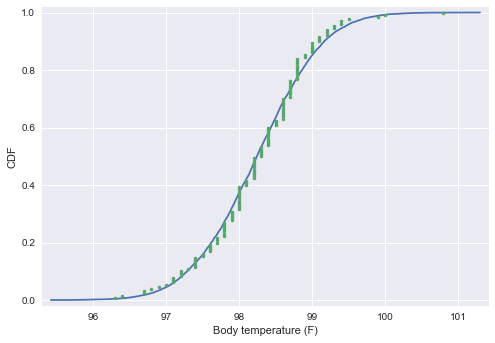

In [42]:
# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the body temperatures are, indeed, Normally distributed. 

# Answer 2

Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [44]:
# sample mean
mu

98.24923076923078

Is the sample size large? 

Yes.
The sample mean of 98.25 F is very close to the population mean of 98.6 F.
Also, the sample is normally distributed as demonstrated above.
As a general rule, sample sizes equal to or greater than 30 are considered sufficient for the central limit theorem to hold (according to http://www.investopedia.com/terms/c/central_limit_theorem.asp).

Are the observations independent?

Yes. Based on the data set information (Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm), the observations should be independent.

# Answer 3
Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

In this situation, it's appropriate to use Z statistics.

In [45]:
np.percentile(temp, [25,50,75])

array([ 97.8,  98.3,  98.7])

Null Hypothesis -- The true mean temperature of our sample is actually population mean.

In [46]:
# A one-sample bootstrap hypothesis test assuming null hypothesis is true

def bootstrap_replicate_temp(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates2 = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates2[i] = bootstrap_replicate_temp(temp, np.mean)

    return bs_replicates2

In [47]:
# Make an array of shifted temperatures: shifted_temp
shifted_temp = temp - np.mean(temp) + 98.6

#calculating the test statistic

def diff_from_pop(data, pop_mean=98.6):
    return np.mean(data) - pop_mean

diff_obs = diff_from_pop(temp)
diff_obs

-0.35076923076921673

In [48]:
# Take bootstrap replicates of shifted temps: bs_replicates3
bs_replicates3 = draw_bs_reps(shifted_temp, diff_from_pop, 10000)

# Compute fraction of replicates that are less than the observed temp: p
p = np.sum(bs_replicates3 <= diff_obs) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. The true population mean does NOT seem to be 98.6F.

# Answer 4

Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [49]:
# small sample size
sm_sample = np.random.choice(temp, 10)

Since our smaple size is 10 it's preferrable to use *T* statistic

In [50]:
sm_sample

array([ 98.8,  97.4,  98.6,  98.4,  98.6,  97.8,  97.2,  98.6,  97.1,  97.4])

In [51]:
np.mean(sm_sample)

97.989999999999995

In [52]:
np.median(sm_sample)

98.099999999999994

In [53]:
np.std(sm_sample)

0.63945289114992454

In [54]:
permuted_sample = np.random.permutation(sm_sample)

In [55]:
from scipy import stats

In [56]:
# one sample T-test
stats.ttest_1samp(sm_sample, popmean=98.6)

Ttest_1sampResult(statistic=-2.8618214497538976, pvalue=0.018724699029811699)

In [57]:
# two sample T-test
stats.ttest_rel(sm_sample,permuted_sample)

Ttest_relResult(statistic=0.0, pvalue=1.0)

In [58]:
stats.ttest_ind(sm_sample, permuted_sample, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [59]:
# Make an array of translated temperatures: translated_temp
translated_sample = sm_sample - np.mean(sm_sample) + 98.6

# Take bootstrap replicates of translated temps: bs_replicates
bs_replicates5 = draw_bs_reps(translated_sample, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temp: p
p = np.sum(bs_replicates5 <= np.mean(sm_sample)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


Small sample size seems to provide same restults as above where null hypothesis (that pop mean is 98.6 ) rejected. Even with small sample size true mean is not 98.6.

# Answer 5

At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.

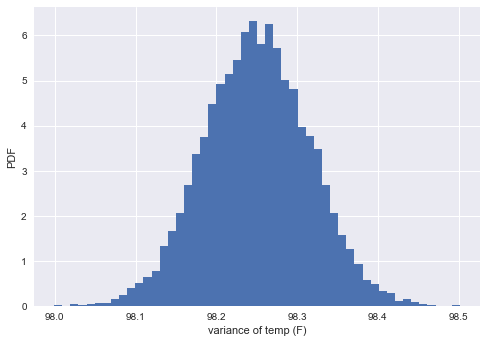

In [60]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_rep_var = draw_bs_reps(temp, np.var, size=10000)

# Make a histogram of the results
_ = plt.hist(bs_rep_var, normed=True, bins=50)
_ = plt.xlabel('variance of temp (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

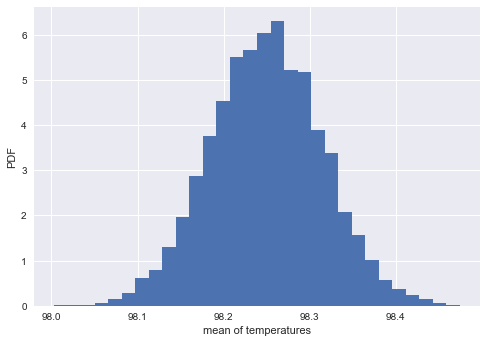

In [61]:
def bootstrap_replicate_temp(data, func):
    """Generate bootstrap replicates of human temp data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Initialize array of replicates: bs_replicates
bs_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_temp(temp, np.mean)
    
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean of temperatures')
_ = plt.ylabel('PDF')
plt.show()

In [62]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([ 98.12307692,  98.37615385])

In [63]:
# Print the confidence interval
print('95% confidence interval =', conf_int, 'body temps')

95% confidence interval = [ 98.12307692  98.37615385] body temps


We should consider body temperature to be abnormal when it falls below 98.1 F or when it's over 98.4 F

# Answer 6

Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.

In [64]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [65]:
# male and female body temps
male_temp = df.temperature[(df.gender == 'M')]
female_temp = df.temperature[(df.gender == 'F')]

In [66]:
len(male_temp)

65

In [67]:
len(female_temp)

65

Since our sample size for both genders are over *Z* test

In [68]:
# mean temp by gender
male_temp_mean = np.mean(male_temp)
female_temp_mean = np.mean(female_temp)

In [69]:
male_temp_mean

98.1046153846154

In [70]:
female_temp_mean

98.39384615384613

In [71]:
mean_diff = female_temp_mean - male_temp_mean
mean_diff

0.289230769230727

In [72]:
male_std = np.std(male_temp)
male_std

0.6933598841828696

In [73]:
female_std = np.std(female_temp)
female_std

0.7377464486428966

In [74]:
# Sample out of a normal distribution with mu and sigma: samples
samples_male = np.random.normal(male_temp_mean, male_std, size=10000)
samples_female = np.random.normal(female_temp_mean, female_std, size=10000)

In [75]:
# Get the CDF of the samples and of the data
x_theor_m, y_theor_m = ecdf(samples_male)
x_theor_f, y_theor_f = ecdf(samples_female)
x_m, y_m = ecdf(male_temp)
x_f, y_f = ecdf(female_temp)

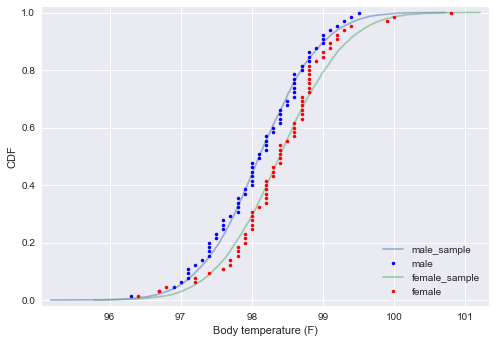

In [76]:
# Plot the CDFs and show the plot
_ = plt.plot(x_theor_m, y_theor_m, alpha=0.5)
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_theor_f, y_theor_f, alpha=0.5)
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')
plt.margins(0.02)
plt.legend(('male_sample','male','female_sample', 'female'), loc='lower right')
_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')
plt.show()

Female body temperature looks to be higher than the male body temperature 

In conclusion, the true population mean of body temperature is more like 98.2 F rather than generally accepted 98.6 F.

In general, we should consider body temperature to be abnormal when it falls below 98.1 F or when it's over 98.4 F.

Also, female body temperature is on average slightly hotter than the male body temperature (on average 0.29 F hotter).